In [1]:
%matplotlib inline
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from src.data.datasets import AirbusDataset
from PIL import Image

In [2]:
data_dir = Path('data') / 'raw'
dataset = AirbusDataset(data_dir / 'train_ship_segmentations_v2.csv', data_dir / 'train_v2')

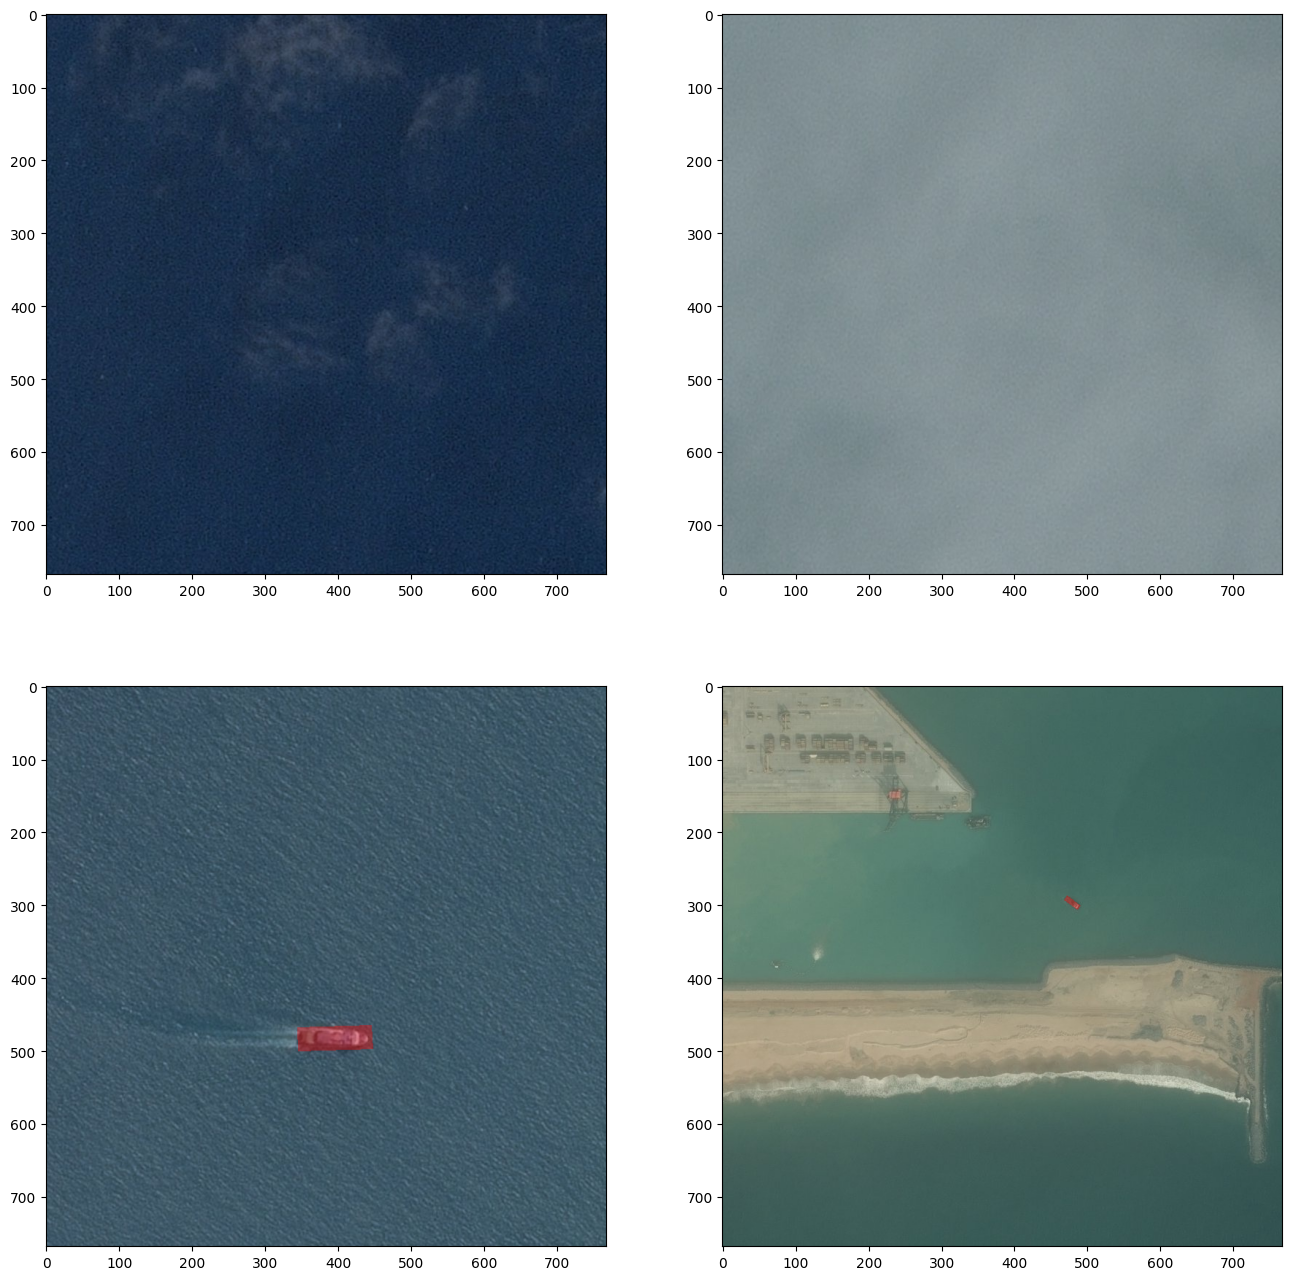

In [3]:
N = 4

plt.figure(figsize=(16,16))
for i in range(N):
    image, rle = dataset[i]
    image = image.convert('RGBA')

    mask = np.zeros((image.height, image.width, 4), dtype=np.int8)
    for offset, length in rle:
        y, x = offset // image.width, offset % image.width
        for j in range(length):
            mask[y,x+j-1] = np.array([255, 0, 0, 100])

    image.alpha_composite(Image.fromarray(mask.transpose(1, 0, 2), 'RGBA'))

    plt.subplot(2, N//2, i+1)
    plt.imshow(image)